In [3]:
from Utils.preprocessing import *
from Utils.pipelineComponents import *
from Utils.preprocessing import *

import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

RANDOM_STATE = 2024

# Webscraping Portion

In [4]:
# Read prof's sample data to view format & data science roles
sample_data_a = pd.read_csv("Data/jobs_in_data.csv")
sample_data_b = pd.read_csv("Data/QF632_Project_2_b.csv")
sample_data_c = pd.read_csv("Data/QF632_Project_2_c.csv")
sample_data_d = pd.read_csv("Data/Glassdoor_Salary_Cleaned_Version.csv")

In [6]:
base_url = "https://h1bdata.info/index.php?em=&job=data+scientist&city=&year=all+years"
roles = ["data scientists", "data analyst", "data storytellers", "data insights", "research scientist", "business data analyst",
        "data analytics", "data engineer", "machine learning", "ml engineer", "ai architect"]

all_df = pd.DataFrame()
for role in roles:
    job = "+".join(role.split(" "))
    url = base_url + "/index.php?em=&job=" + job + "&city=&year=all+years"
    dfs_base = pd.read_html(url)
    
    # to include all other variations, add a '&'
    url = base_url + "/index.php?em=&job=" + job + "+&&city=&year=all+years"
    dfs_var = pd.read_html(url)
    
    temp_df = pd.concat([dfs_base[0], dfs_var[0]])
    temp_df["TYPE"] = role
    
    all_df = pd.concat([all_df, temp_df])

print(all_df.shape)
all_df.sample(5)

(56733, 8)


,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,TYPE,Unnamed: 6
175,HCL GLOBAL SYSTEMS INC,DATA ENGINEER,82640,"PEORIA, IL",03/21/2019,09/14/2019,data engineer,NaN
6845,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,RESEARCH SCIENTIST,125000,"CAMBRIDGE, MA",04/14/2017,09/01/2017,research scientist,NaN
9026,META PLATFORMS INC,RESEARCH SCIENTIST,177716,"MENLO PARK, CA",08/18/2023,10/01/2023,research scientist,NaN
3471,DREXEL UNIVERSITY,RESEARCH SCIENTIST,70000,"PHILADELPHIA, PA",02/21/2023,04/01/2023,research scientist,NaN
4211,APPLE INC,MACHINE LEARNING RESEARCH ENGINEER,198890,"CUPERTINO, CA",12/19/2022,03/28/2023,machine learning,NaN


# Data Analysis

In [47]:
all_df["START DATE"] = pd.to_datetime(all_df["START DATE"], errors='coerce')
all_df["SUBMIT DATE"] = pd.to_datetime(all_df["SUBMIT DATE"], errors='coerce')
all_df = all_df.drop_duplicates()

# Remove all non-numeric "y" values
all_df2 = all_df[pd.to_numeric(all_df['BASE SALARY'], errors='coerce').notnull()].copy()

# all_df2 = all_df.dropna(subset = ["BASE SALARY"]).copy()
all_df2 = all_df2.iloc[:, :-1].reset_index(drop=True)
all_df2["YEAR"] = pd.DatetimeIndex(all_df2['START DATE']).year

# To get state, first remove all symbols, then take the last two letters
regex = re.compile('[^a-zA-Z]')
all_df2['STATE'] = all_df2.LOCATION.apply(lambda x:regex.sub('', x)[-2:])
all_df2 = all_df2.rename(columns={"BASE SALARY":"y"})
all_df2["y"] =  pd.to_numeric(all_df2["y"]) / 1000

print(all_df2.shape)
all_df2.sample(5)

(52246, 9)


,EMPLOYER,JOB TITLE,y,LOCATION,SUBMIT DATE,START DATE,TYPE,YEAR,STATE
26471,AMAZONCOM SERVICES LLC,RESEARCH SCIENTIST II,185.0,"NEW YORK, NY",2022-06-14,2022-06-19,research scientist,2022,NY
51469,SITUATION PUBLISHING LIMITED INC,MACHINE LEARNING REPORTER,70.0,"SAN FRANCISCO, CA",2021-06-18,2021-10-01,machine learning,2021,CA
49462,UPSTART NETWORK INC,MACHINE LEARNING ENGINEER,155.0,"JERSEY CITY, NJ",2020-11-09,2020-12-01,machine learning,2020,NJ
25350,AMAZON FULFILLMENT SERVICES INC,RESEARCH SCIENTIST I,120.0,"SUNNYVALE, CA",2017-10-16,2017-10-30,research scientist,2017,CA
7545,ULAB INC,DATA ANALYST,85.0,"PLANO, TX",2018-03-21,2018-09-01,data analyst,2018,TX


## Numerical Features

## Categorical features
- Not sure if there is a way to further categorize the data into bigger subgroups (i.e., segregating state to urban and rural areas)

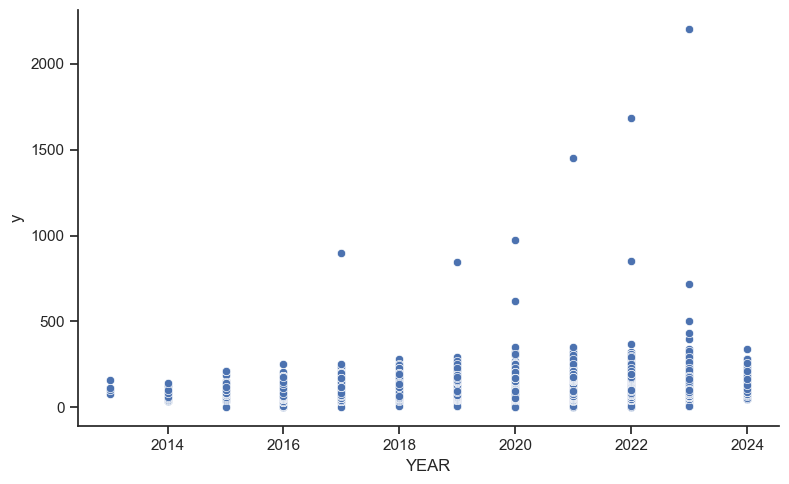

In [49]:
sns.relplot(data=all_df2, x='YEAR', y='y',aspect=1.61)
plt.show()

In [ ]:
sns.set(style='ticks')

sns.relplot(data=all_df2, x='YEAR', y='y', hue='STATE',aspect=1.61)
plt.show()